# Task 1 - Exploratory Data Analysis (EDA) on Retail Sales Data

The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions.

<b>Dataset</b> - https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

<b> Done By</b> - Shweta Alukuru Trikutam

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Understanding the dataset

In [2]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.shape

(1000, 9)

In [5]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

## 3. Descriptive Analysis

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
print("\nMode Values:")
print(df.mode())


Mode Values:
     Transaction ID       Date Customer ID  Gender   Age Product Category  \
0                 1 2023-05-16     CUST001  Female  43.0         Clothing   
1                 2        NaT     CUST002     NaN  64.0              NaN   
2                 3        NaT     CUST003     NaN   NaN              NaN   
3                 4        NaT     CUST004     NaN   NaN              NaN   
4                 5        NaT     CUST005     NaN   NaN              NaN   
..              ...        ...         ...     ...   ...              ...   
995             996        NaT     CUST995     NaN   NaN              NaN   
996             997        NaT     CUST996     NaN   NaN              NaN   
997             998        NaT     CUST997     NaN   NaN              NaN   
998             999        NaT     CUST998     NaN   NaN              NaN   
999            1000        NaT     CUST999     NaN   NaN              NaN   

     Quantity  Price per Unit  Total Amount  
0         4.0  

### <b> Checking for Missing Values

In [7]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

> There are no Missing Vlaue or Null values present

### <b> Handling the Date column

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

## 4. Time Series Analysis

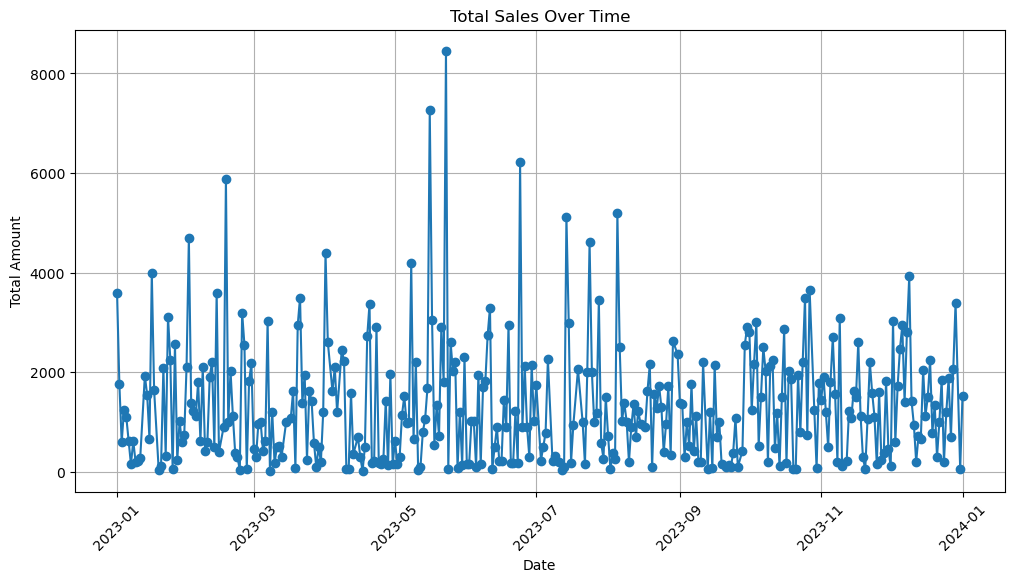

In [10]:
import matplotlib.pyplot as plt

# Group by date and sum the total amount
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()


> Highest sales between `2023-05` and `2023-07`

## 5. Customer and Product Analysis

### <b> Customer Demographics

In [11]:
# Analyze customer demographics (age and gender)
age_distribution = df['Age'].describe()
gender_distribution = df['Gender'].value_counts()

print("Age Distribution:")
print(age_distribution)
print("\nGender Distribution:")
print(gender_distribution)


Age Distribution:
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

Gender Distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64


### <b> Product Analysis

In [12]:
# Analyze product categories
product_distribution = df['Product Category'].value_counts()

print("\nProduct Category Distribution:")
print(product_distribution)



Product Category Distribution:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


## 6. EDA

### <b>Distribution Plots for Numeric Columns

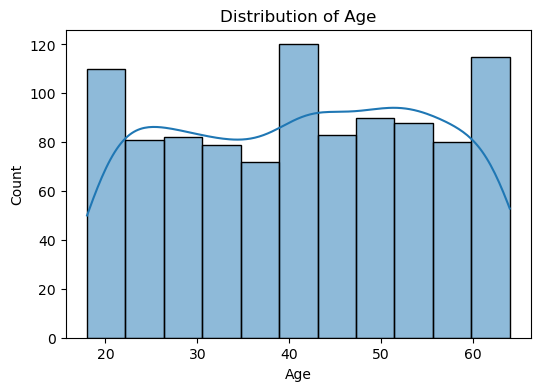

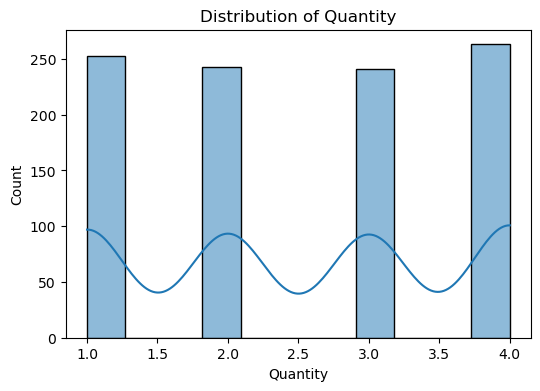

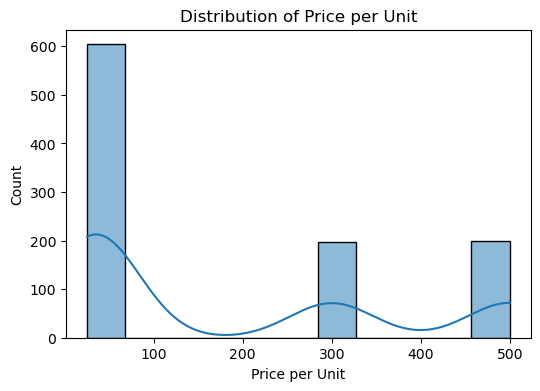

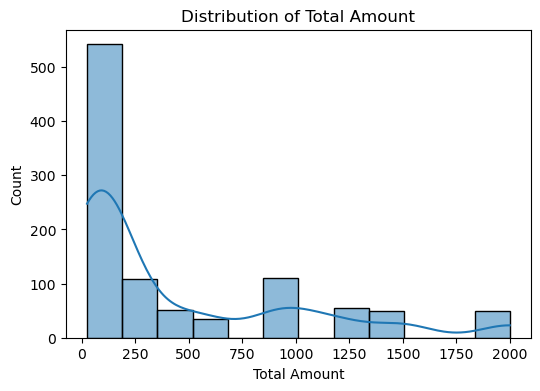

In [17]:
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### <b>Analyzing Categorical Columns

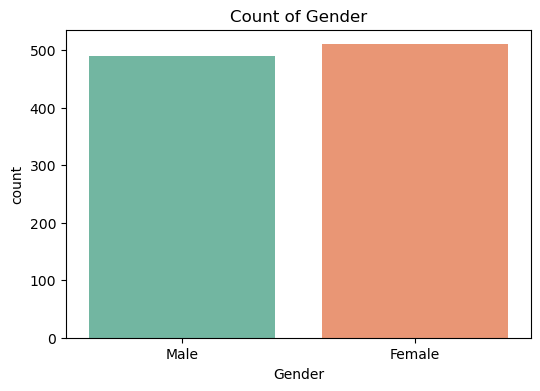

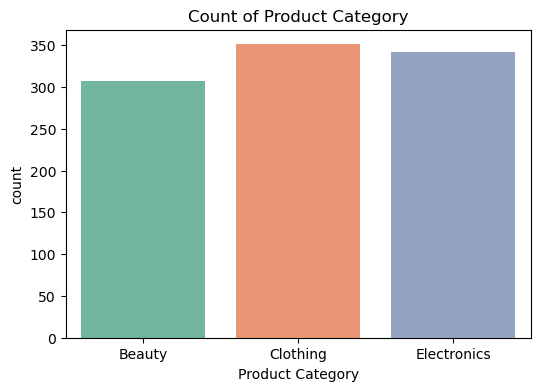

In [18]:
categorical_columns = ['Gender', 'Product Category']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.show()


> Insights - 
1. `Female` counts are slightly higher than `Males`.
2. `Clothing` product category has higher counts.


### <b>Box Plot for Quantity and Total Amount by Product Category

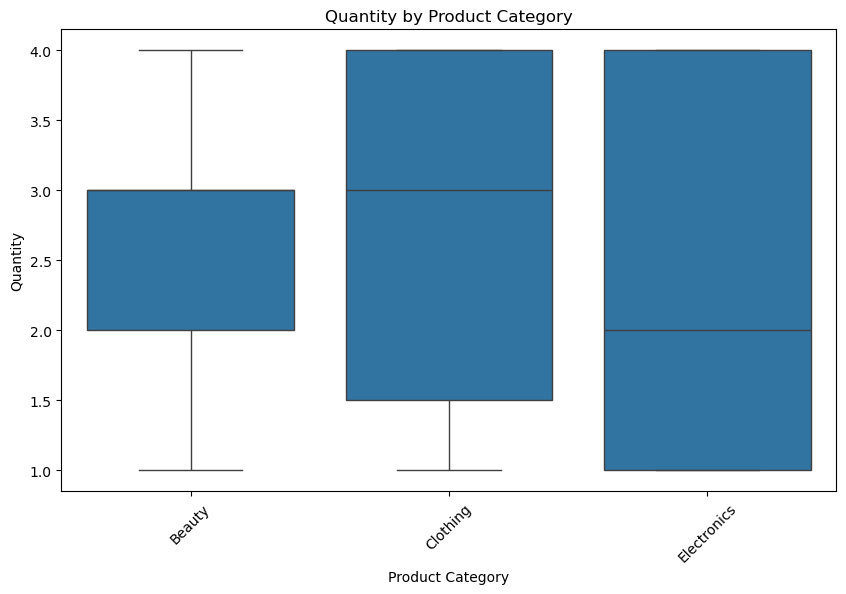

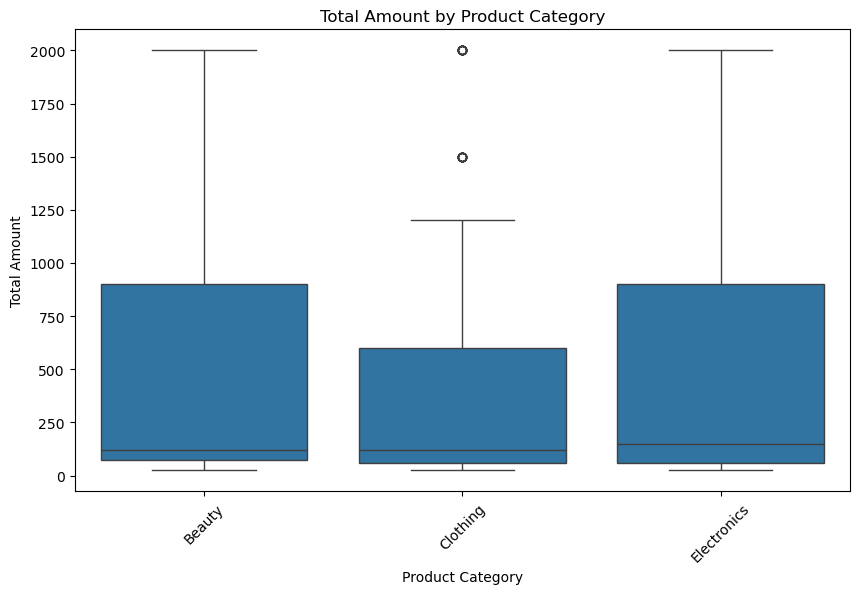

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product Category', y='Quantity')
plt.title('Quantity by Product Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product Category', y='Total Amount')
plt.title('Total Amount by Product Category')
plt.xticks(rotation=45)
plt.show()


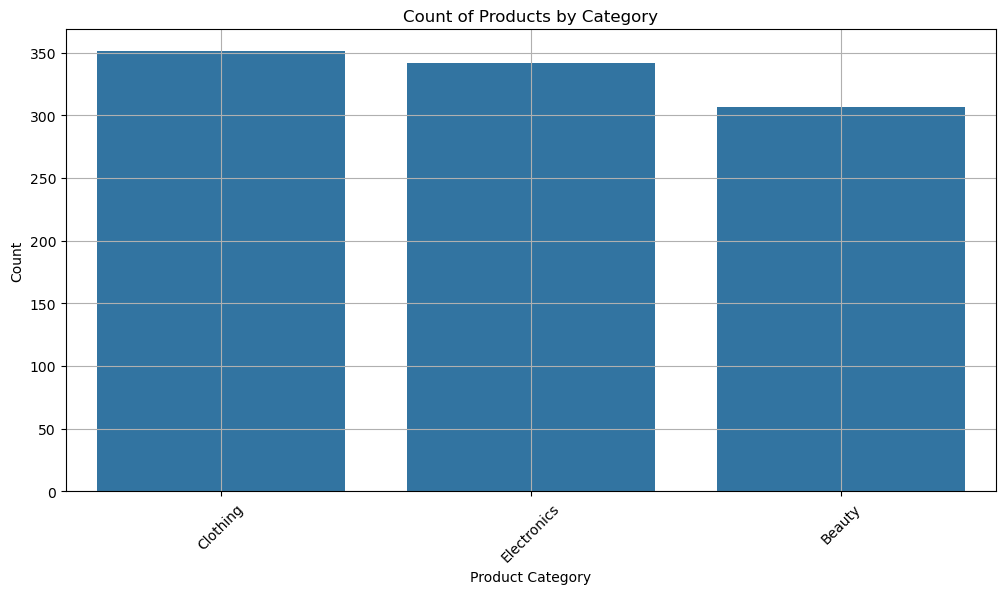

In [13]:
# Bar chart for product categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Count of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()


### <b> HeatMap Correlation

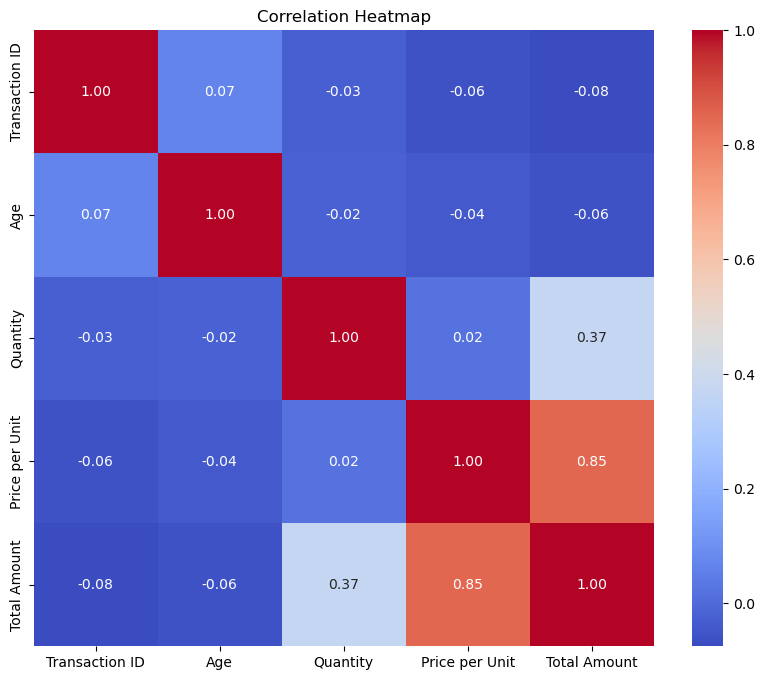

In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

> High Correlation between `Total Amount` and `Price per unit` = 0.85


# Recommendations

1. Focus on product categories that have high sales to specific customer demographics. 
2. Monitor sales trends over time to ensure popular products are in stock during peak sales periods.
3. Implement promotions for less popular products or categories to boost sales.
